In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Load the image
img = cv2.imread('/content/Screenshot 2022-11-19 at 6.44.41 PM.png')

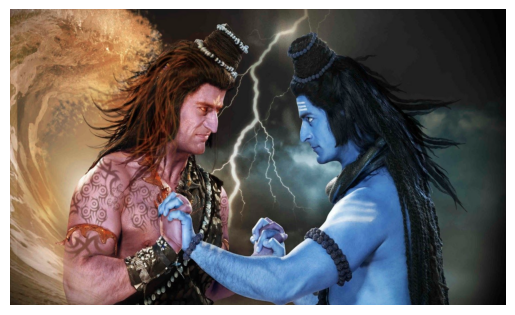

In [3]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

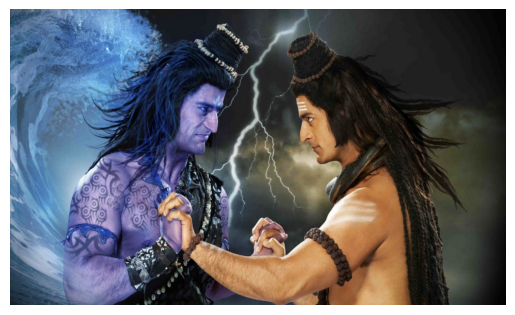

In [5]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [6]:
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

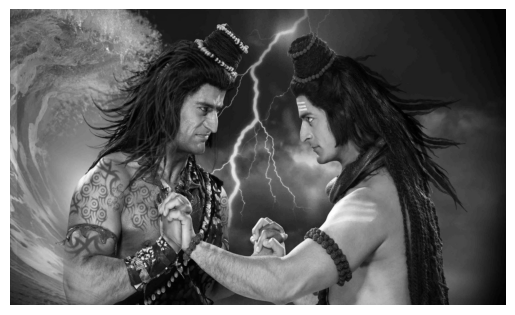

In [8]:
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

In [9]:
# Apply thresholding
ret, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

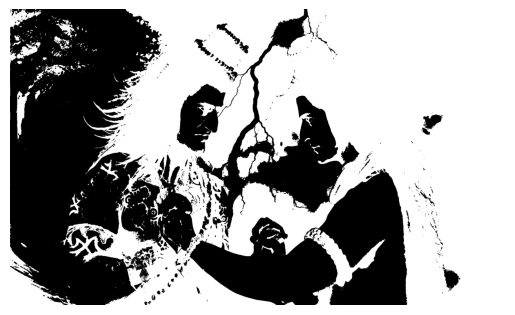

In [15]:
plt.imshow(threshold, cmap='gray')
plt.axis('off')
plt.show()

In [10]:
# Perform morphological opening to remove noise
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel, iterations=2)

In [11]:
# Find background region
sure_bg = cv2.dilate(opening, kernel, iterations=3)

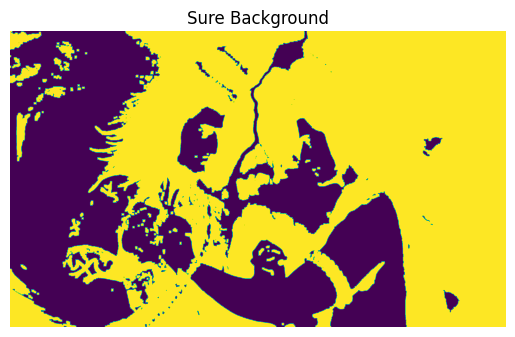

In [43]:
plt.imshow(sure_bg)
plt.title('Sure Background')
plt.axis('off')
plt.show()

In [32]:
# Find foreground region
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 3)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

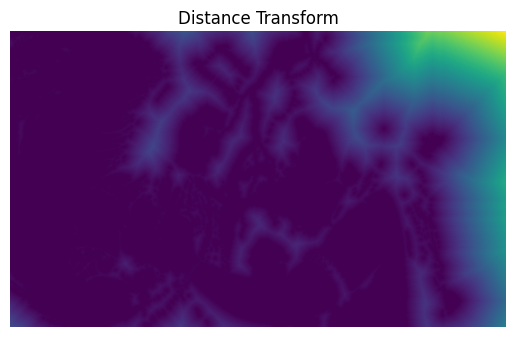

In [44]:
plt.imshow(dist_transform)
plt.title('Distance Transform')
plt.axis('off')
plt.show()

In [34]:
# Create marker image
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

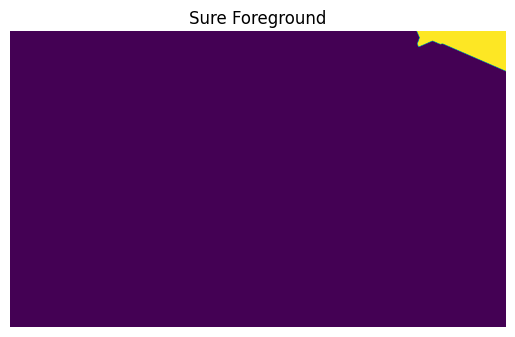

In [45]:
plt.imshow(sure_fg)
plt.title('Sure Foreground')
plt.axis('off')
plt.show()

In [37]:
# Apply Watershed algorithm
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
watershed = cv2.watershed(img, markers)

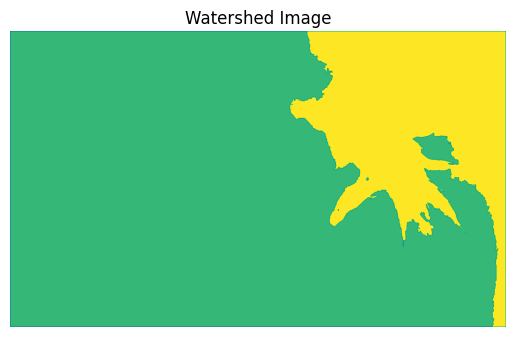

In [46]:
plt.imshow(watershed)
plt.title('Watershed Image')
plt.axis('off')
plt.show()

In [40]:
# Apply colormap to the markers
colored_markers = np.zeros_like(img)
colored_markers[markers == -1] = [255, 0, 0]  # Boundaries in blue color

In [41]:
# Display the segmented image
segmented_image = cv2.addWeighted(img, 0.7, colored_markers, 0.3, 0)

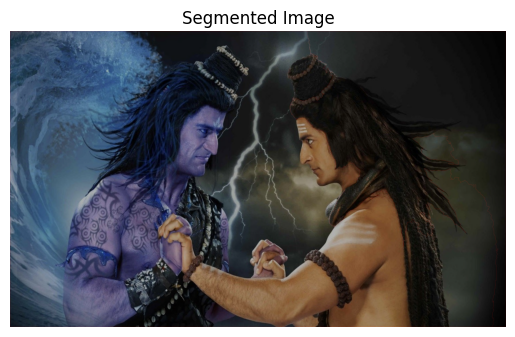

In [42]:
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.axis('off')
plt.show()